[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/StadynR/HAR-imu-photogrammetry/blob/main/Notebooks/Dataset%201/IMU%20-%20Best%20Features.ipynb)

# Dataset 1 - IMU (Best Features)

This notebook contains code and explanations for the training and testing of 7 different AI architectures for the task of Human Action Recognition using time series data obtained from motion sensors (accelerometers, gyroscopes).

## Access to Google Drive and load dataset

You need to create a shortcut in your Drive home to this folder: https://drive.google.com/drive/folders/1k2sAkmRyyctE1uOc19mrixyt2N47-7pt?usp=share_link

In [163]:
#Drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
#Read document
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Datasets/Dataset 1/United IMU Movements.csv')
df

,Movimiento,Tiempo,AAx,AAy,AAz,AGx,AGy,AGz,AMx,AMy,...,FMz,HAx,HAy,HAz,HGx,HGy,HGz,HMx,HMy,HMz
0,Extension,1.362169,-1.592737,-13.426290,10.321053,0.030519,0.022889,0.000000,-12.012085,11.719108,...,2.636799,-0.029340,10.151600,-2.539996,0.015259,-0.007630,0.022889,1.464888,18.311106,-39.551988
1,Extension,2.697656,-1.770572,-13.326295,10.286324,-0.007630,-0.030519,0.045778,-11.426130,12.158574,...,4.248177,0.038920,10.217465,-2.234023,0.000000,-0.022889,0.038148,2.050844,18.750572,-39.405499
2,Extension,3.993365,-1.993915,-13.483773,10.280935,-0.038148,-0.022889,0.076296,-11.865596,10.107730,...,4.248177,0.086822,9.817485,-2.302882,0.000000,0.007630,0.000000,2.050844,18.750572,-39.698477
3,Extension,5.365950,-1.964575,-13.485569,10.391708,0.038148,-0.083926,0.068667,-12.305063,10.547197,...,3.515732,-0.117360,9.899517,-2.674121,-0.015259,-0.015259,0.022889,1.757866,16.992706,-36.329234
4,Extension,6.687254,-1.786140,-13.508322,10.344405,0.000000,0.091556,-0.022889,-12.158574,11.572619,...,4.394665,0.011975,9.958795,-2.356771,0.015259,0.000000,0.007630,1.757866,17.725150,-39.112522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,Pronacion,83.418597,-7.398441,0.160471,3.944718,0.007630,-0.015259,0.053407,13.037507,27.686392,...,6.152532,-5.327285,14.917834,-6.066770,0.000000,0.000000,0.000000,-13.769951,35.889767,-49.659719
1356,Pronacion,84.707351,-7.412812,0.182027,3.671677,-0.022889,0.015259,0.000000,12.744530,27.686392,...,4.687643,-5.537454,14.962742,-5.809896,-0.022889,-0.015259,0.022889,-12.891018,35.303812,-50.245674
1357,Pronacion,86.053538,-7.353533,0.342498,3.575873,-0.015259,-0.045778,0.000000,12.158574,27.539903,...,4.834132,-5.669184,15.083096,-5.811692,-0.038148,-0.045778,0.007630,-13.623463,35.303812,-49.220252
1358,Pronacion,87.382261,-7.471491,-0.070655,3.536953,0.000000,0.000000,0.015259,12.891018,26.807459,...,5.273598,-5.583560,15.009447,-5.876959,0.030519,-0.007630,0.030519,-14.502396,35.889767,-48.634297


## Dataset Information

In [165]:
# Data information (rows and columns)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movimiento  1360 non-null   object 
 1   Tiempo      1360 non-null   float64
 2   AAx         1360 non-null   float64
 3   AAy         1360 non-null   float64
 4   AAz         1360 non-null   float64
 5   AGx         1360 non-null   float64
 6   AGy         1360 non-null   float64
 7   AGz         1360 non-null   float64
 8   AMx         1360 non-null   float64
 9   AMy         1360 non-null   float64
 10  AMz         1360 non-null   float64
 11  FAx         1360 non-null   float64
 12  FAy         1360 non-null   float64
 13  FAz         1360 non-null   float64
 14  FGx         1360 non-null   float64
 15  FGy         1360 non-null   float64
 16  FGz         1360 non-null   float64
 17  FMx         1360 non-null   float64
 18  FMy         1360 non-null   float64
 19  FMz         1360 non-null  

(1360, 29)

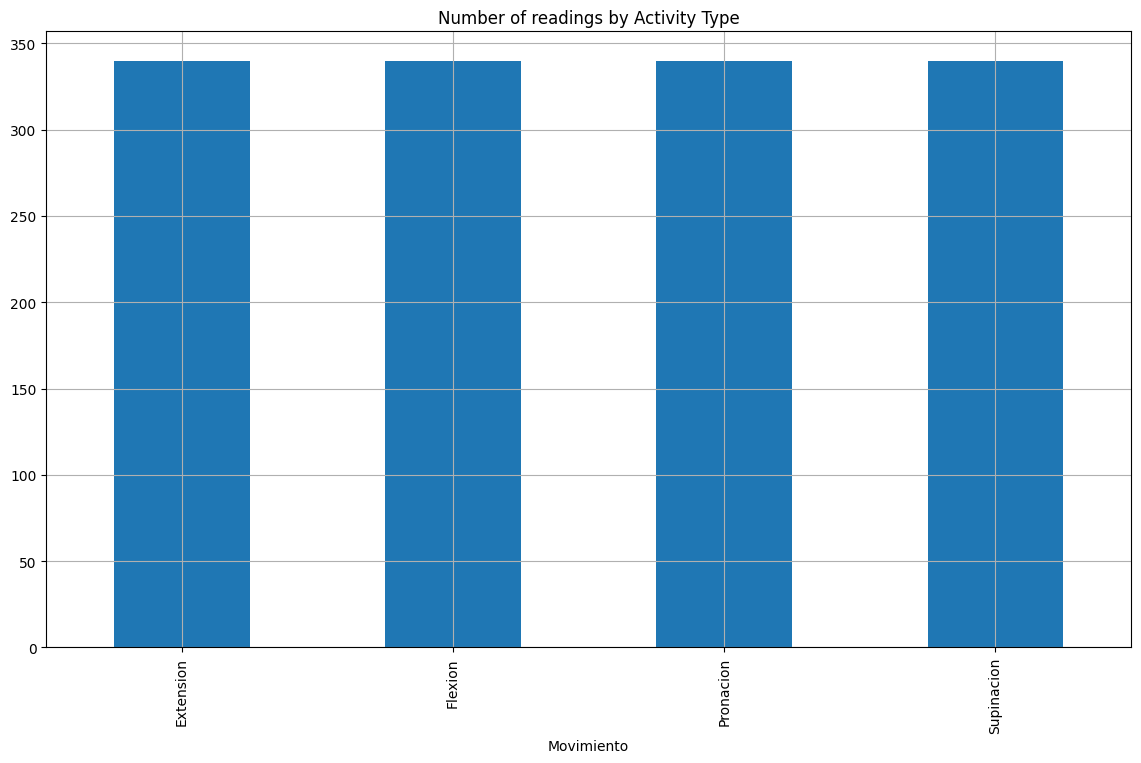

In [166]:
# Count of instances of every activity
countOfActivities = df['Movimiento'].value_counts()
countOfActivities.plot(kind='bar',title='Number of readings by Activity Type',figsize=(14,8),grid=True);

In [167]:
# Visualization

import matplotlib.pyplot as plt
labs = ["AGx",'AGy','AGz', 'AAx','AAy','AAz', 'AMx','AMy','AMz','FAx','FAy','FAz','FGx','FGy','FGz','FMx','FMy','FMz','HAx','HAy','HAz','HGx','HGy','HGz','HMx','HMy','HMz']

def plot_activity(activity,df,start=0,stop=20):
  # extractRowsOfActivity = (df['Movimiento'] == activity)  # Output will be true/false.
  data = df[:] # data has only rows that are for the requested activity.
  # data = data[['AAx','AAy','AAz','AGx','AGy','AGz','AMx','AMy','AMz','FAx','FAy','FAz','FGx','FGy','FGz','FMx','FMy','FMz','HAx','HAy','HAz','HGx','HGy','HGz','HMx','HMy','HMz']] # data has only the accelerometer columns of one IMU.
  data = data[['AAx','AAy','AAz','AGx','AGy','AGz','AMx','AMy','AMz','FAx','FAy','FAz','FGx','FGy','FGz']] # data has only the accelerometer columns of one IMU.
  data = data[start:stop]

  ax = data.plot(subplots=True,figsize=(16,12)) # Plot accelerometer for the activity.
  ax = ax.flat
  fig = ax[0].get_figure()
  for idx, x in enumerate(ax):
    x.legend([labs[idx]], loc="upper left")
    x.set_yticks([])
  plt.show()

### Dataset information plot

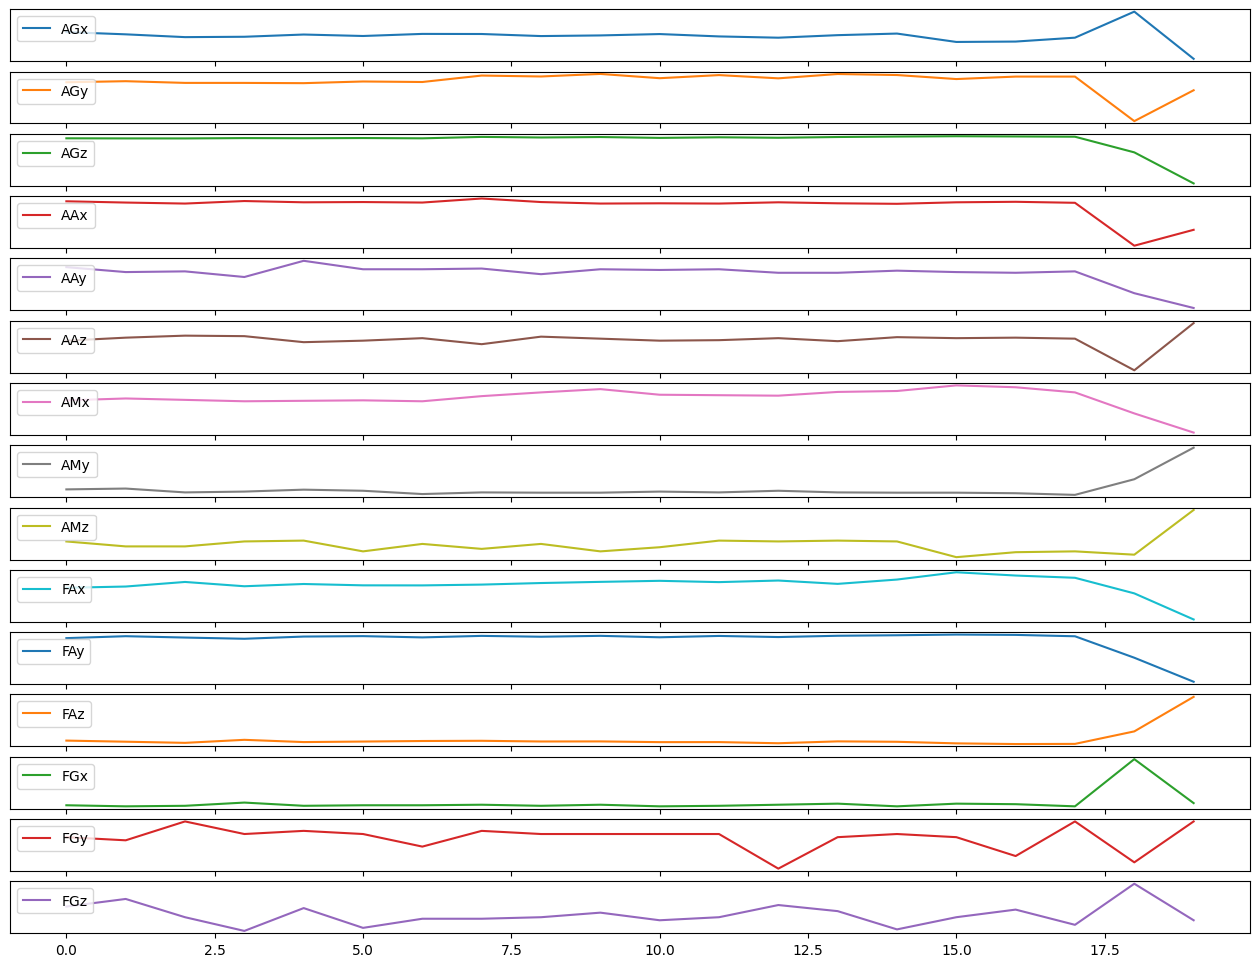

In [168]:
plot_activity('Extension',df)

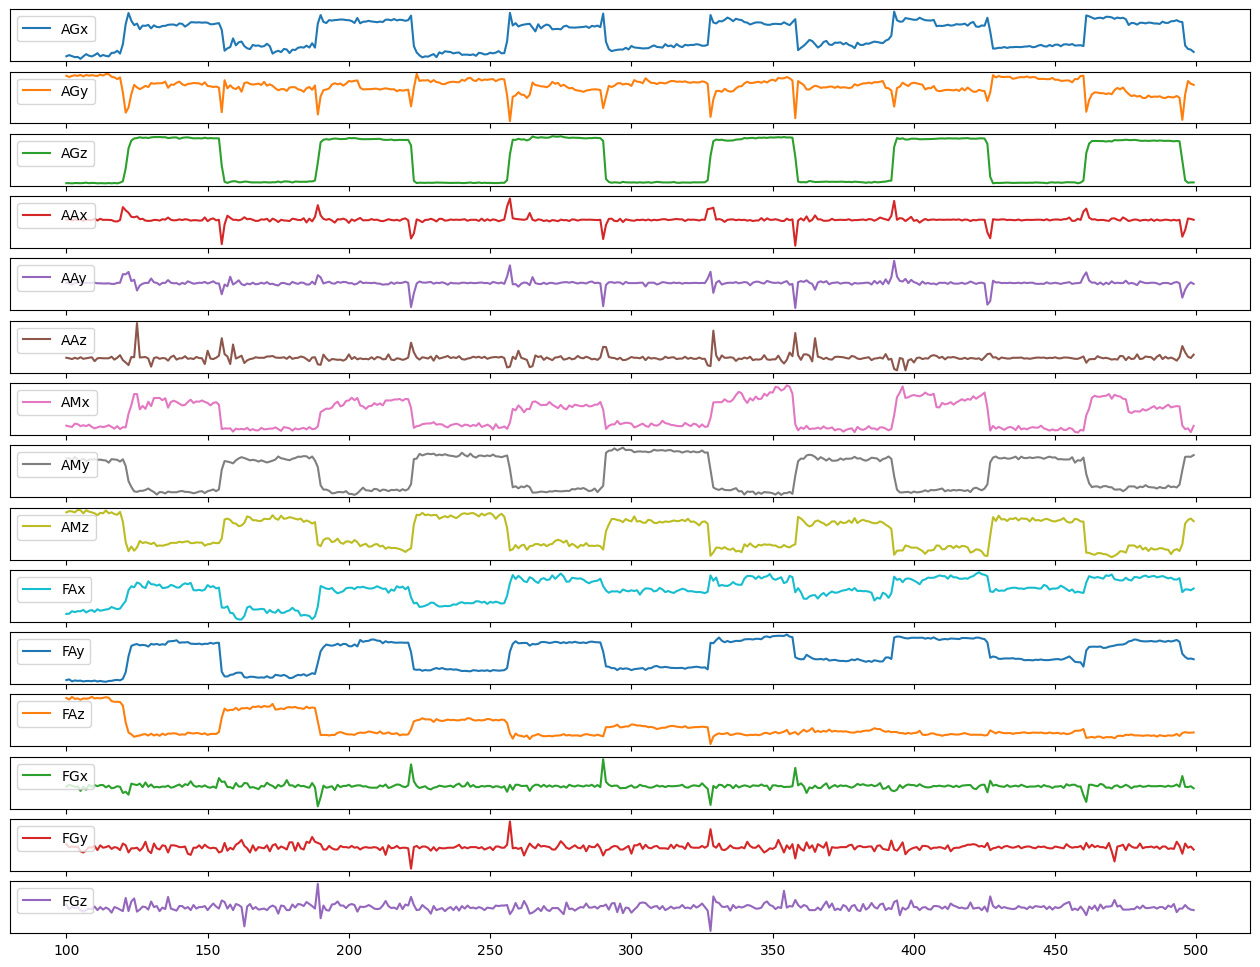

In [169]:
plot_activity('Flexion',df,100,500)

### Feature Importance

**Method:** Random Forest

In [170]:
df.iloc[:, 1:]

,Tiempo,AAx,AAy,AAz,AGx,AGy,AGz,AMx,AMy,AMz,...,FMz,HAx,HAy,HAz,HGx,HGy,HGz,HMx,HMy,HMz
0,1.362169,-1.592737,-13.426290,10.321053,0.030519,0.022889,0.000000,-12.012085,11.719108,-42.774743,...,2.636799,-0.029340,10.151600,-2.539996,0.015259,-0.007630,0.022889,1.464888,18.311106,-39.551988
1,2.697656,-1.770572,-13.326295,10.286324,-0.007630,-0.030519,0.045778,-11.426130,12.158574,-43.653676,...,4.248177,0.038920,10.217465,-2.234023,0.000000,-0.022889,0.038148,2.050844,18.750572,-39.405499
2,3.993365,-1.993915,-13.483773,10.280935,-0.038148,-0.022889,0.076296,-11.865596,10.107730,-43.653676,...,4.248177,0.086822,9.817485,-2.302882,0.000000,0.007630,0.000000,2.050844,18.750572,-39.698477
3,5.365950,-1.964575,-13.485569,10.391708,0.038148,-0.083926,0.068667,-12.305063,10.547197,-42.774743,...,3.515732,-0.117360,9.899517,-2.674121,-0.015259,-0.015259,0.022889,1.757866,16.992706,-36.329234
4,6.687254,-1.786140,-13.508322,10.344405,0.000000,0.091556,-0.022889,-12.158574,11.572619,-42.628254,...,4.394665,0.011975,9.958795,-2.356771,0.015259,0.000000,0.007630,1.757866,17.725150,-39.112522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,83.418597,-7.398441,0.160471,3.944718,0.007630,-0.015259,0.053407,13.037507,27.686392,-58.302560,...,6.152532,-5.327285,14.917834,-6.066770,0.000000,0.000000,0.000000,-13.769951,35.889767,-49.659719
1356,84.707351,-7.412812,0.182027,3.671677,-0.022889,0.015259,0.000000,12.744530,27.686392,-58.595538,...,4.687643,-5.537454,14.962742,-5.809896,-0.022889,-0.015259,0.022889,-12.891018,35.303812,-50.245674
1357,86.053538,-7.353533,0.342498,3.575873,-0.015259,-0.045778,0.000000,12.158574,27.539903,-58.742027,...,4.834132,-5.669184,15.083096,-5.811692,-0.038148,-0.045778,0.007630,-13.623463,35.303812,-49.220252
1358,87.382261,-7.471491,-0.070655,3.536953,0.000000,0.000000,0.015259,12.891018,26.807459,-58.742027,...,5.273598,-5.583560,15.009447,-5.876959,0.030519,-0.007630,0.030519,-14.502396,35.889767,-48.634297


In [171]:
df.iloc[:, 0]

,Movimiento
0,Extension
1,Extension
2,Extension
3,Extension
4,Extension
...,...
1355,Pronacion
1356,Pronacion
1357,Pronacion
1358,Pronacion


In [172]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(df.iloc[:, 2:], df.iloc[:, 0], test_size=.2,random_state=4)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=.2,random_state=4)
X_train.shape

(870, 27)

In [173]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data
clf.fit(X_train, Y_train)

def list_importances(features, importances):
  zipped = zip(features, importances)
  df = pd.DataFrame(list(sorted(zipped, reverse=True, key = lambda x: x[1])), columns =['Features', 'Importance'])
  return df

features = list(df.columns)[2:]
df_importance = list_importances(features, clf.feature_importances_)
df_importance

,Features,Importance
0,HAy,0.146984
1,HMx,0.121620
2,HAx,0.098694
3,HAz,0.094915
4,HMz,0.088830
5,AMx,0.061337
6,AAy,0.060033
7,AAz,0.048930
8,AMz,0.045654
9,FAx,0.038693


## Preprocessing

- Normalizing the measurements to be between 0 and 1.
- Transforming the measurements to be in a 3-D array of [samples, timesteps,features].
- Hot encoding the activity names.
- Breaking the 3-D array into a training and test dataset.

### Data Normalization

In [174]:
#NORMALIZATION

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df['AAx_mms'] = mms.fit_transform(df[['AAx']])
df['AAy_mms'] = mms.fit_transform(df[['AAy']])
df['AAz_mms'] = mms.fit_transform(df[['AAz']])

df['AGx_mms'] = mms.fit_transform(df[['AGx']])
df['AGy_mms'] = mms.fit_transform(df[['AGy']])
df['AGz_mms'] = mms.fit_transform(df[['AGz']])

df['AMx_mms'] = mms.fit_transform(df[['AMx']])
df['AMy_mms'] = mms.fit_transform(df[['AMy']])
df['AMz_mms'] = mms.fit_transform(df[['AMz']])

df['FAx_mms'] = mms.fit_transform(df[['FAx']])
df['FAy_mms'] = mms.fit_transform(df[['FAy']])
df['FAz_mms'] = mms.fit_transform(df[['FAz']])

df['FGx_mms'] = mms.fit_transform(df[['FGx']])
df['FGy_mms'] = mms.fit_transform(df[['FGy']])
df['FGz_mms'] = mms.fit_transform(df[['FGz']])

df['FMx_mms'] = mms.fit_transform(df[['FMx']])
df['FMy_mms'] = mms.fit_transform(df[['FMy']])
df['FMz_mms'] = mms.fit_transform(df[['FMz']])

df['HAx_mms'] = mms.fit_transform(df[['HAx']])
df['HAy_mms'] = mms.fit_transform(df[['HAy']])
df['HAz_mms'] = mms.fit_transform(df[['HAz']])

df['HGx_mms'] = mms.fit_transform(df[['HGx']])
df['HGy_mms'] = mms.fit_transform(df[['HGy']])
df['HGz_mms'] = mms.fit_transform(df[['HGz']])

df['HMx_mms'] = mms.fit_transform(df[['HMx']])
df['HMy_mms'] = mms.fit_transform(df[['HMy']])
df['HMz_mms'] = mms.fit_transform(df[['HMz']])

df.describe().round(2)

,Tiempo,AAx,AAy,AAz,AGx,AGy,AGz,AMx,AMy,AMz,...,FMz_mms,HAx_mms,HAy_mms,HAz_mms,HGx_mms,HGy_mms,HGz_mms,HMx_mms,HMy_mms,HMz_mms
count,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,...,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00
mean,45.22,-4.60,-10.62,1.85,-0.01,-0.02,0.03,-8.78,28.11,-42.93,...,0.43,0.54,0.44,0.41,0.60,0.49,0.30,0.44,0.55,0.43
std,25.66,2.62,6.39,6.45,0.16,0.11,0.20,15.85,10.81,10.71,...,0.19,0.31,0.25,0.30,0.05,0.05,0.05,0.30,0.23,0.30
min,1.29,-9.48,-19.15,-7.19,-1.40,-1.03,-1.94,-25.20,5.57,-60.35,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.23,-7.00,-15.82,-4.15,-0.03,-0.03,0.00,-21.83,25.01,-52.88,...,0.30,0.37,0.23,0.08,0.59,0.49,0.29,0.16,0.39,0.16
50%,45.20,-4.62,-12.33,0.48,-0.01,-0.02,0.02,-19.04,31.93,-42.92,...,0.42,0.54,0.37,0.38,0.59,0.49,0.29,0.32,0.58,0.41
75%,67.30,-2.07,-1.78,7.46,0.01,0.00,0.05,9.45,35.74,-34.53,...,0.55,0.68,0.72,0.55,0.61,0.49,0.31,0.75,0.74,0.69
max,89.59,2.72,0.44,11.67,1.15,0.84,1.85,22.85,44.83,-21.09,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [175]:
df

,Movimiento,Tiempo,AAx,AAy,AAz,AGx,AGy,AGz,AMx,AMy,...,FMz_mms,HAx_mms,HAy_mms,HAz_mms,HGx_mms,HGy_mms,HGz_mms,HMx_mms,HMy_mms,HMz_mms
0,Extension,1.362169,-1.592737,-13.426290,10.321053,0.030519,0.022889,0.000000,-12.012085,11.719108,...,0.200000,0.953848,0.327501,0.792552,0.602804,0.488889,0.317829,0.908451,0.055901,0.341270
1,Extension,2.697656,-1.770572,-13.326295,10.286324,-0.007630,-0.030519,0.045778,-11.426130,12.158574,...,0.295652,0.957660,0.334003,0.828053,0.593458,0.483333,0.333333,0.936620,0.074534,0.345238
2,Extension,3.993365,-1.993915,-13.483773,10.280935,-0.038148,-0.022889,0.076296,-11.865596,10.107730,...,0.295652,0.960336,0.294514,0.820064,0.593458,0.494444,0.294574,0.936620,0.074534,0.337302
3,Extension,5.365950,-1.964575,-13.485569,10.391708,0.038148,-0.083926,0.068667,-12.305063,10.547197,...,0.252174,0.948931,0.302613,0.776990,0.584112,0.486111,0.317829,0.922535,0.000000,0.428571
4,Extension,6.687254,-1.786140,-13.508322,10.344405,0.000000,0.091556,-0.022889,-12.158574,11.572619,...,0.304348,0.956155,0.308465,0.813811,0.602804,0.491667,0.302326,0.922535,0.031056,0.353175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,Pronacion,83.418597,-7.398441,0.160471,3.944718,0.007630,-0.015259,0.053407,13.037507,27.686392,...,0.408696,0.657938,0.798061,0.383354,0.593458,0.491667,0.294574,0.176056,0.801242,0.067460
1356,Pronacion,84.707351,-7.412812,0.182027,3.671677,-0.022889,0.015259,0.000000,12.744530,27.686392,...,0.321739,0.646199,0.802495,0.413158,0.579439,0.486111,0.317829,0.218310,0.776398,0.051587
1357,Pronacion,86.053538,-7.353533,0.342498,3.575873,-0.015259,-0.045778,0.000000,12.158574,27.539903,...,0.330435,0.638842,0.814377,0.412950,0.570093,0.475000,0.302326,0.183099,0.776398,0.079365
1358,Pronacion,87.382261,-7.471491,-0.070655,3.536953,0.000000,0.000000,0.015259,12.891018,26.807459,...,0.356522,0.643624,0.807106,0.405377,0.612150,0.488889,0.325581,0.140845,0.801242,0.095238


In [176]:
def plot_activity_norm(activity,df,start=0,stop=20):
  extractRowsOfActivity = (df['Movimiento'] == activity)  # Output will be true/false.
  data = df[extractRowsOfActivity] # data has only rows that are for the requested activity.
  data = data[['AAx_mms','AAy_mms','AAz_mms','AGx_mms','AGy_mms','AGz_mms', 'AMx_mms','AMy_mms','AMz_mms','FAx_mms','FAy_mms','FAz_mms','FGx_mms','FGy_mms','FGz_mms', 'FMx_mms','FMy_mms','FMz_mms', 'HAx_mms','HAy_mms','HAz_mms','HGx_mms','HGy_mms','HGz_mms', 'HMx_mms','HMy_mms','HMz_mms']] # data has only the accelerometer columns of one IMU.
  data = data[start:stop]

  ax = data.plot(subplots=True,figsize=(16,12),title=activity+ ', Start Row: '+str(start)+' Stop row: '+str(stop)) # Plot accelerometer for the activity.

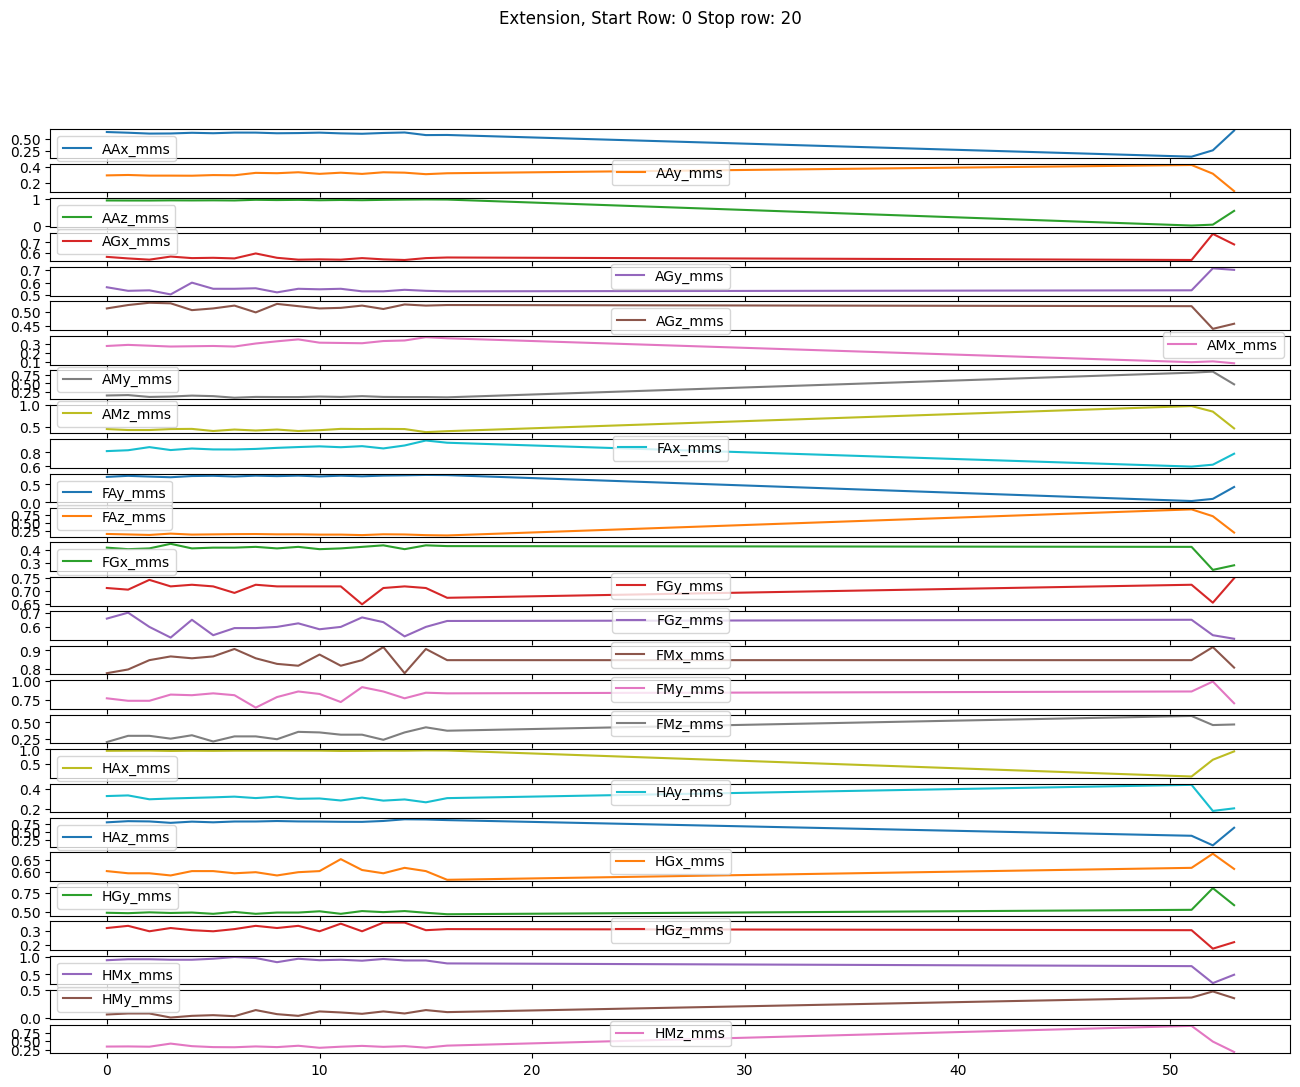

In [177]:
plot_activity_norm('Extension',df)

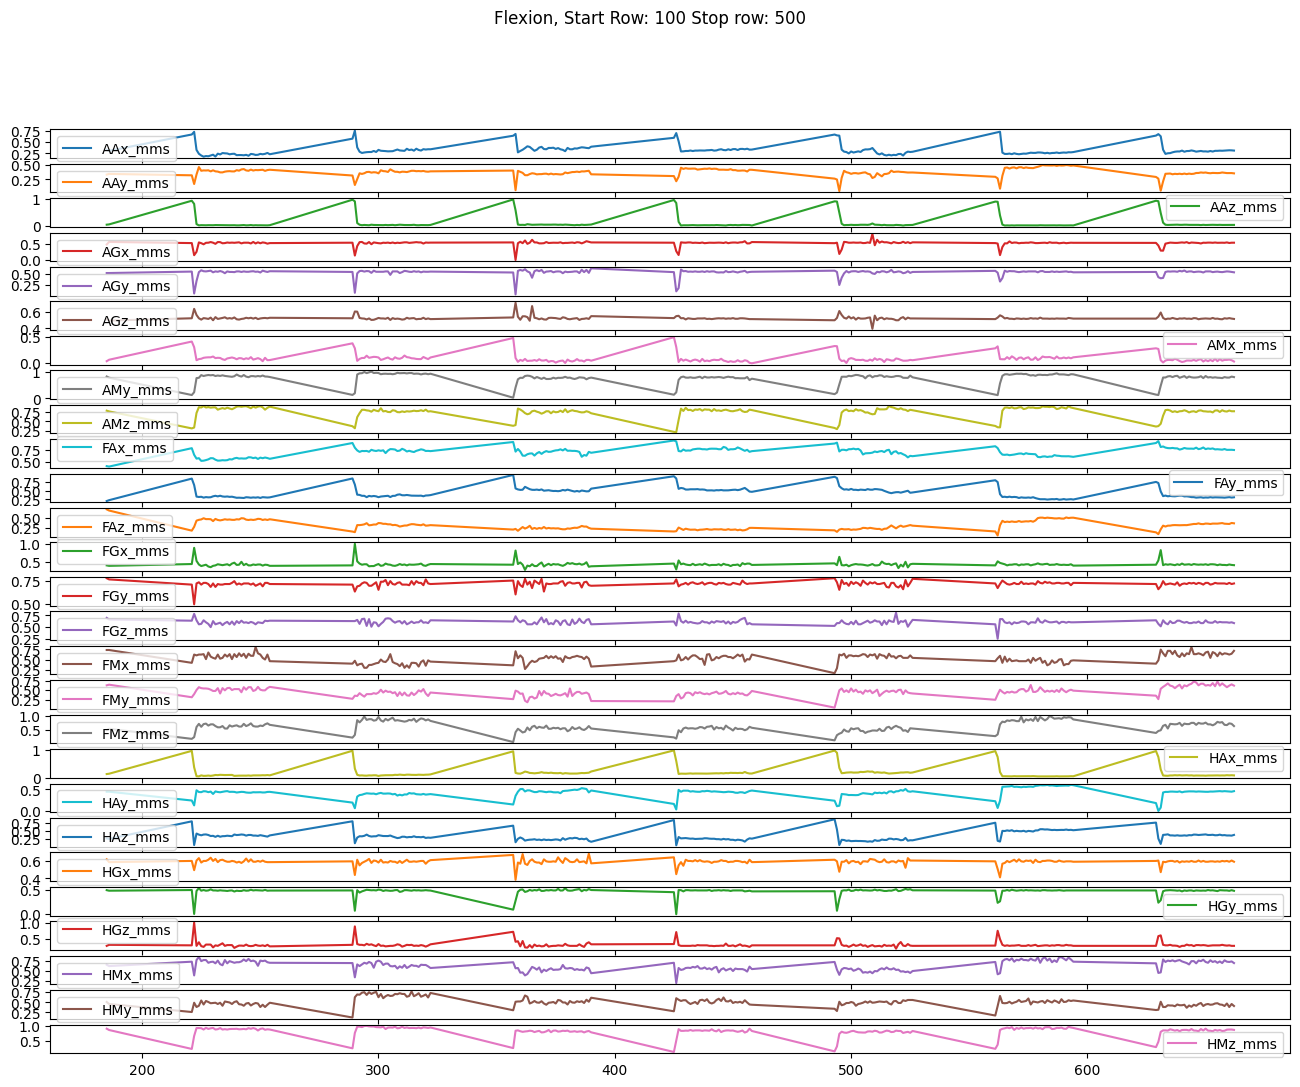

In [178]:
plot_activity_norm('Flexion',df,100,500)

### Transformation of dimensions as a 3D array

Due to the low number of elements in the dataset, the number of samples was changed to 10, so that the final training and testing datasets do not have very few elements.

In [179]:
# Az3	0.127717
# Mx3	0.127032
# Mz3	0.126262
# Ay3	0.113951

In [181]:
import numpy as np
from scipy import stats
#nSamplesInEach = 200
nSamplesInEach = 10
nFeatures = 4
samples = []
labels = []
for i in range(0,len(df)-nSamplesInEach,nSamplesInEach):  # Collecting samples
  # ax1 = df['AAx_mms'].values[i:i+nSamplesInEach]
  # ay1 = df['AAy_mms'].values[i:i+nSamplesInEach]
  # az1 = df['AAz_mms'].values[i:i+nSamplesInEach]

  # gx1 = df['AGx_mms'].values[i:i+nSamplesInEach]
  # gy1 = df['AGy_mms'].values[i:i+nSamplesInEach]
  # gz1 = df['AGz_mms'].values[i:i+nSamplesInEach]

  # mx1 = df['AMx_mms'].values[i:i+nSamplesInEach]
  # my1 = df['AMy_mms'].values[i:i+nSamplesInEach]
  # mz1 = df['AMz_mms'].values[i:i+nSamplesInEach]

  # ax2 = df['FAx_mms'].values[i:i+nSamplesInEach]
  # ay2 = df['FAy_mms'].values[i:i+nSamplesInEach]
  # az2 = df['FAz_mms'].values[i:i+nSamplesInEach]

  # gx2 = df['FGx_mms'].values[i:i+nSamplesInEach]
  # gy2 = df['FGy_mms'].values[i:i+nSamplesInEach]
  # gz2 = df['FGz_mms'].values[i:i+nSamplesInEach]

  # mx2 = df['FMx_mms'].values[i:i+nSamplesInEach]
  # my2 = df['FMy_mms'].values[i:i+nSamplesInEach]
  # mz2 = df['FMz_mms'].values[i:i+nSamplesInEach]

  # ax3 = df['HAx_mms'].values[i:i+nSamplesInEach]
  ay3 = df['HAy_mms'].values[i:i+nSamplesInEach]
  az3 = df['HAz_mms'].values[i:i+nSamplesInEach]

  # gx3 = df['HGx_mms'].values[i:i+nSamplesInEach]
  # gy3 = df['HGy_mms'].values[i:i+nSamplesInEach]
  # gz3 = df['HGz_mms'].values[i:i+nSamplesInEach]

  mx3 = df['HMx_mms'].values[i:i+nSamplesInEach]
  # my3 = df['HMy_mms'].values[i:i+nSamplesInEach]
  mz3 = df['HMz_mms'].values[i:i+nSamplesInEach]

  # label = stats.mode(df['Movimiento'][i:i+nSamplesInEach])
  # label = label[0][0]
  label = df['Movimiento'][i:i+nSamplesInEach].mode()
  label = label.iloc[0]

  # samples.append([ax1, ay1, az1, gx1, gy1, gz1, mx1, my1, mz1, ax2, ay2, az2, gx2, gy2, gz2, mx2, my2, mz2, ax3, ay3, az3, gx3, gy3, gz3, mx3, my3, mz3])
  samples.append([ay3, az3, mx3, mz3])
  labels.append(label)

# Dimensions of resulting tensor
np.array(samples).shape


(135, 4, 10)

### Reshape

This is necessary so that the dimensions of the tensor are in the correct order, that is, to change the shape from (samples, features, timesteps) to (samples, timesteps, features).

In [182]:
#Reshape
reshaped_s = np.array(samples).reshape(-1,nSamplesInEach,nFeatures)
np.array(reshaped_s).shape

(135, 10, 4)

In [183]:
# Length of datasrt after preprocessing
print(len(reshaped_s))

135


### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [184]:
#Labels
text_labels = labels[:]
orig_labels = list(dict.fromkeys(labels)) # Get unique labels
for i in range(len(text_labels)):
  if text_labels[i] == "Extension":
    text_labels[i] = 0
  elif text_labels[i] == "Flexion":
    text_labels[i] = 1
  elif text_labels[i] == "Pronacion":
    text_labels[i] = 2
  else:
    text_labels[i] = 3
text_labels = np.array(text_labels)
print(orig_labels)
print(text_labels)

['Extension', 'Flexion', 'Pronacion', 'Supinacion']
[0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 2 2 3 3 3 2
 2 2 2 3 3 3 2 2 2 3 3 3 3 2 2 2 3 3 3 2 2 2 2 3 3 3 2 2 2 2 3 3 3 2 2 2 2
 3 3 3 2 2 2 3 3 3 3 2 2 2 3 3 3 2 2 2 2 3 3 3 2]


In [185]:
labels = np.array(pd.get_dummies(labels))
labels[:10]

array([[ True, False, False, False],
       [ True, False, False, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [ True, False, False, False],
       [ True, False, False, False],
       [ True, False, False, False],
       [ True, False, False, False],
       [False,  True, False, False]])

In [186]:
# Identify unique encoded labels
_, idx = np.unique(labels, axis=0, return_index=True)
encoded_labels = labels[np.sort(idx)]
print(encoded_labels)

[[ True False False False]
 [False  True False False]
 [False False  True False]
 [False False False  True]]


In [187]:
# Shape of the label list
labels.shape

(135, 4)

## Creation of training, testing and validation splits



In [188]:
# Create a kfold object of 5 splits

from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

## Architectures

### Architecture 1: LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: https://www.analyticsvidhya.com/blog/2021/07/implementing-lstm-for-human-activity-recognition-using-smartphone-accelerometer-data/

In [189]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, Reshape

This simple architecture uses a LSTM layer of 128 neurons to process the time series data, then a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

**Loss function:** Categorical Cross Entropy

**Optimizer:** Adam

In [190]:
def create_model(n_outputs):
  model = Sequential()
  # RNN layer
  model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
  # Dropout layer
  model.add(Dropout(0.5))
  # Dense layer with ReLu
  model.add(Dense(units = 64, activation='relu'))
  # Softmax layer
  model.add(Dense(n_outputs, activation = 'softmax'))

  print(model.summary())
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

#### Train the model

Train the model for 50 epochs in mini-batches of 32 samples (because the dataset is small). This will be done for all the splits made by the kfold. This is 50 iterations over all samples in the `x_train` and `y_train` tensors.

In [191]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score
import tensorflow as tf

# Initialization of train and test

X = reshaped_s
Y = labels

In [192]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 50, batch_size = 32, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch1_train_acc = np.mean(train_accuracies)
arch1_train_loss = np.mean(train_losses)
arch1_test_acc = np.mean(test_accuracies)
arch1_test_loss = np.mean(test_losses)
arch1_precision = np.mean(precisions)
arch1_recall = np.mean(recalls)
arch1_f1_score = np.mean(f1_scores)

arch1_train_std = np.std(train_accuracies)
arch1_test_std = np.std(test_accuracies)
arch1_precision_std = np.std(precisions)
arch1_recall_std = np.std(recalls)
arch1_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch1_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch1_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch1_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch1_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch1_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch1_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch1_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_35 (LSTM)                       │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_101 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,612 (299.27 KB)

 Trainable params: 76,612 (299.27 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Train Accuracy:  0.9722222089767456
Train Loss:  0.10029549896717072
Test Accuracy:  1.0
Test Loss:  0.023538904454874412
Precision:  1.0
Recall:  1.0
F1 score:  1.0
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 2 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-192-96ab3ac637b4>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_102 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,612 (299.27 KB)

 Trainable params: 76,612 (299.27 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Train Accuracy:  0.9444444179534912
Train Loss:  0.09687154740095139
Test Accuracy:  0.9629629629629629
Test Loss:  0.10792104297154756
Precision:  0.9691358024691359
Recall:  0.9629629629629629
F1 score:  0.9632219632219632
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 3 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-192-96ab3ac637b4>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_37 (LSTM)                       │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_103 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,612 (299.27 KB)

 Trainable params: 76,612 (299.27 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Train Accuracy:  0.9629629850387573
Train Loss:  0.10342731326818466
Test Accuracy:  0.9629629629629629
Test Loss:  0.08539298815506167
Precision:  0.9663299663299663
Recall:  0.9629629629629629
F1 score:  0.9621612954946288
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 4 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-192-96ab3ac637b4>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                       │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_104 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,612 (299.27 KB)

 Trainable params: 76,612 (299.27 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Train Accuracy:  0.9814814925193787
Train Loss:  0.03750207647681236
Test Accuracy:  0.8518518518518519
Test Loss:  0.932433453817701
Precision:  0.8979423868312758
Recall:  0.8518518518518519
F1 score:  0.8558201058201058
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 5 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-192-96ab3ac637b4>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_39 (LSTM)                       │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_105 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,612 (299.27 KB)

 Trainable params: 76,612 (299.27 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Train Accuracy:  0.9537037014961243
Train Loss:  0.11897291243076324
Test Accuracy:  1.0
Test Loss:  0.018032646831007648
Precision:  1.0
Recall:  1.0
F1 score:  1.0
-----------------------------------------------------------------------------------------------

Mean Train Accuracy: 96.30% (+/- 1.31%)
Mean Train Loss: 9.14%
Mean Test Accuracy: 95.56% (+/- 5.44%)
Mean Test Loss: 23.35%
Mean Precision: 96.67% (+/- 3.73%)
Mean Recall: 95.56% (+/- 5.44%)
Mean F1 score: 95.62% (+/- 5.29%)


<ipython-input-192-96ab3ac637b4>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])


#### Create a graph of accuracy and loss over time

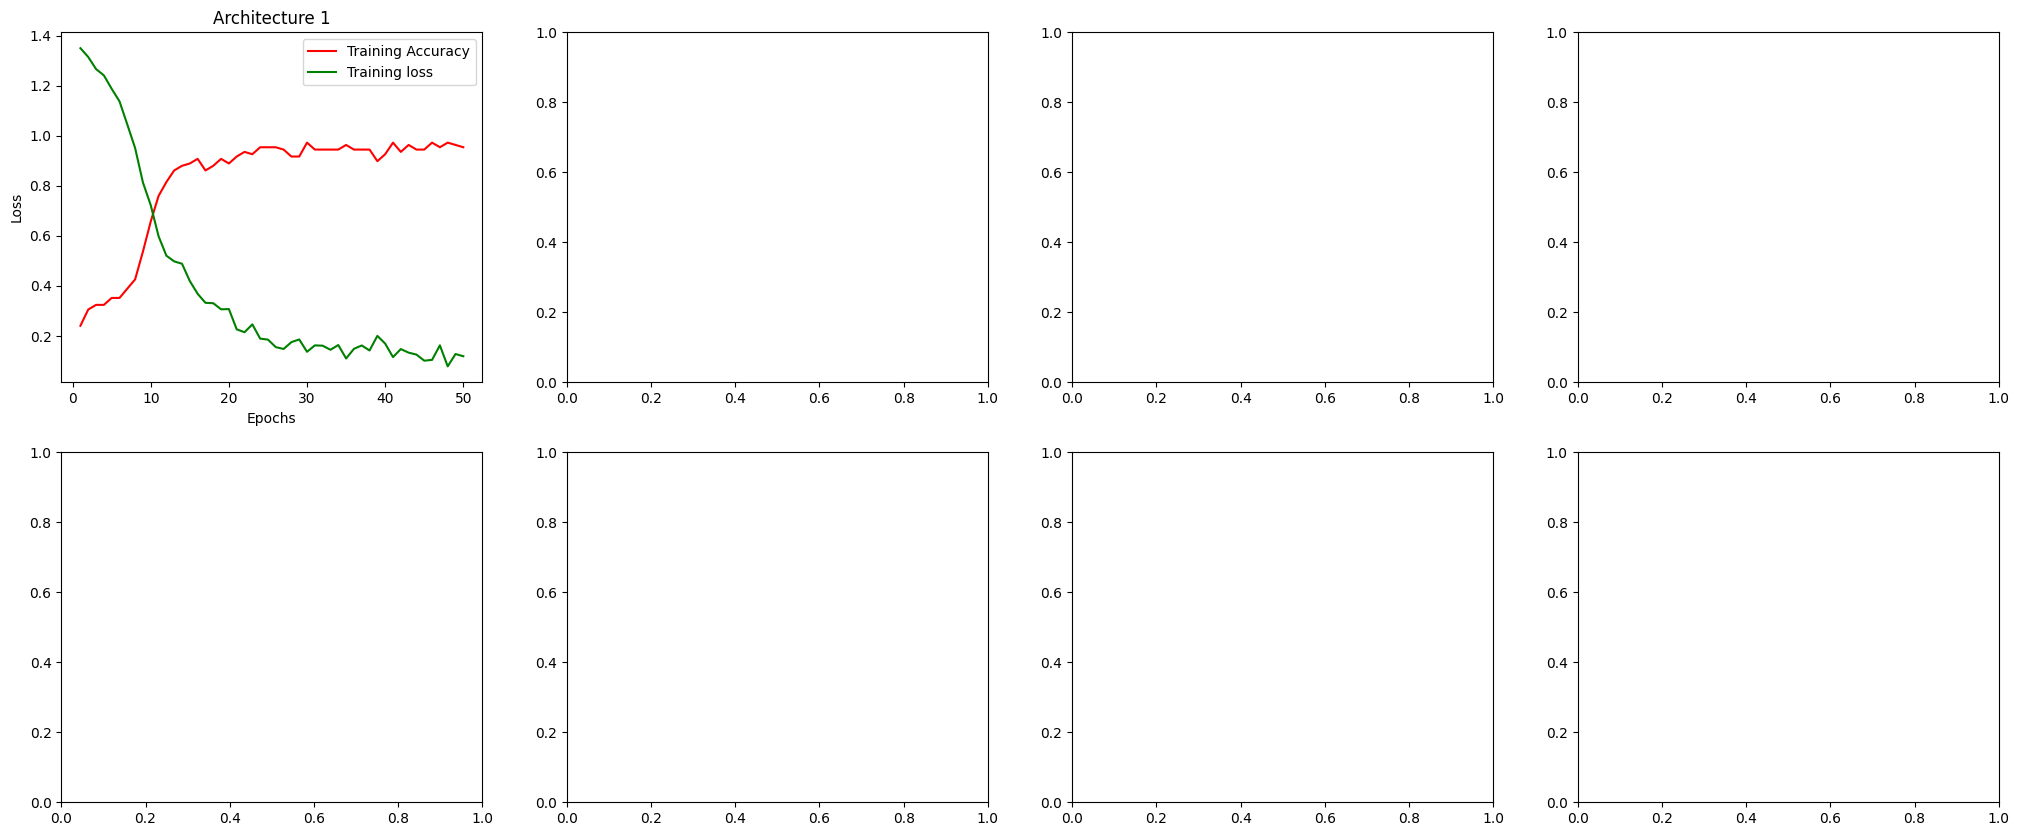

In [193]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

# Create 7 subplots in a grid with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

axes[0, 0].plot(epochs, acc, 'r', label='Training Accuracy')
axes[0, 0].plot(epochs, loss, 'g', label='Training loss')
axes[0, 0].set_title("Architecture 1")
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

### Architecture 2: LSTM(128) + Dropout + LSTM(64) + Dropout + Fully Connected

Source: https://github.com/srvds/Human-Activity-Recognition

This architecture uses a LSTM layer of 128 neurons to process the time series data, then a dropout layer to prevent overfitting, another LSTM and another dropout layer for improving the previous architecture, and a fully connected layer to map the information from previous layers to the 4 outputs.

In [194]:
def create_model(n_outputs):
  # Initiliazing the sequential model
  model = keras.Sequential()
  # Add LSTM layer
  model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
  # Adding a dropout layer
  model.add(Dropout(0.5))
  # Add another LSTM layer
  model.add(LSTM(64))
  # Adding a dropout layer
  model.add(Dropout(0.5))
  # Adding a dense output layer with sigmoid activation
  model.add(Dense(n_outputs, activation='sigmoid'))

  print(model.summary())

  #lost function and optimizer
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#### Evaluate the model

In [195]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 50, batch_size = 32, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch2_train_acc = np.mean(train_accuracies)
arch2_train_loss = np.mean(train_losses)
arch2_test_acc = np.mean(test_accuracies)
arch2_test_loss = np.mean(test_losses)
arch2_precision = np.mean(precisions)
arch2_recall = np.mean(recalls)
arch2_f1_score = np.mean(f1_scores)

arch2_train_std = np.std(train_accuracies)
arch2_test_std = np.std(test_accuracies)
arch2_precision_std = np.std(precisions)
arch2_recall_std = np.std(recalls)
arch2_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch2_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch2_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch2_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch2_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch2_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch2_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch2_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                       │ (None, 10, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_106 (Dropout)                │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_41 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_107 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_144 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,764 (460.02 KB)

 Trainable params: 117,764 (460.02 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


<ipython-input-195-482cd464a8fc>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train Accuracy:  0.9351851940155029
Train Loss:  0.13387030363082886
Test Accuracy:  0.9629629629629629
Test Loss:  0.012415146754013198
Precision:  0.9675925925925926
Recall:  0.9629629629629629
F1 score:  0.9615520282186949
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 2 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                       │ (None, 10, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_108 (Dropout)                │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_43 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_109 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,764 (460.02 KB)

 Trainable params: 117,764 (460.02 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Train Accuracy:  0.9722222089767456
Train Loss:  0.07047644257545471
Test Accuracy:  0.8888888888888888
Test Loss:  0.022895306247621445
Precision:  0.9135802469135803
Recall:  0.8888888888888888
F1 score:  0.8898092648092649
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 3 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-195-482cd464a8fc>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                       │ (None, 10, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_110 (Dropout)                │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_45 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_111 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,764 (460.02 KB)

 Trainable params: 117,764 (460.02 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Train Accuracy:  0.9722222089767456
Train Loss:  0.12501657009124756
Test Accuracy:  0.9259259259259259
Test Loss:  0.014546333834739546
Precision:  0.9312169312169312
Recall:  0.9259259259259259
F1 score:  0.9263757684810316
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 4 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-195-482cd464a8fc>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                       │ (None, 10, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_112 (Dropout)                │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_47 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_113 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,764 (460.02 KB)

 Trainable params: 117,764 (460.02 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Train Accuracy:  0.9907407164573669
Train Loss:  0.03232400491833687
Test Accuracy:  0.8888888888888888
Test Loss:  0.1306869340043999
Precision:  0.9146090534979423
Recall:  0.8888888888888888
F1 score:  0.890299823633157
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 5 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-195-482cd464a8fc>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                       │ (None, 10, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_114 (Dropout)                │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_49 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_115 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,764 (460.02 KB)

 Trainable params: 117,764 (460.02 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Train Accuracy:  0.9629629850387573
Train Loss:  0.13906656205654144
Test Accuracy:  1.0
Test Loss:  0.005323786894712475
Precision:  1.0
Recall:  1.0
F1 score:  1.0
-----------------------------------------------------------------------------------------------

Mean Train Accuracy: 96.67% (+/- 1.81%)
Mean Train Loss: 10.02%
Mean Test Accuracy: 93.33% (+/- 4.32%)
Mean Test Loss: 3.72%
Mean Precision: 94.54% (+/- 3.36%)
Mean Recall: 93.33% (+/- 4.32%)
Mean F1 score: 93.36% (+/- 4.25%)


<ipython-input-195-482cd464a8fc>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


#### Create a graph of accuracy and loss over time

In [196]:
epochs = range(1, len(acc) + 1)

axes[0, 1].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 1].plot(epochs, loss, 'g', label='Training loss')
axes[0, 1].set_title("Architecture 2")
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

### Architecture 3: Conv1D(64) + Conv1D(64) + Dropout + Max Pooling + Flatten + Fully Connected + Fully Connected

Source: https://github.com/CDAC-lab/ETFA-Workshop/blob/main/CNN%20and%20LSTM%20for%20Human%20Activity%20Recognition.ipynb

This architecture focuses on convolutional neural networks. The first two layers are 1D convolutions of 64 filters, then a dropout layer to prevent overfitting, a max pooling layer to reduce dimensionality, a flatten layer to use dense layers, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [197]:
def create_model(n_outputs):

  # Define the model
  model = keras.Sequential()

  # Add a 1D Convolutional layer with 32 filters and a kernel size of 3
  model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))

  # Add a 1D Convolutional layer with 64 filters and a kernel size of 3
  model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a Max Pooling layer with a pool size of 2
  model.add(MaxPooling1D(pool_size=2))

  # Add a Flatten layer
  model.add(Flatten())

  # Add a fully connected layer
  model.add(Dense(units=100, activation='relu'))

  # Add an output layer
  model.add(Dense(units=n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#### Evaluate the model

In [198]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 50, batch_size = 32, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch3_train_acc = np.mean(train_accuracies)
arch3_train_loss = np.mean(train_losses)
arch3_test_acc = np.mean(test_accuracies)
arch3_test_loss = np.mean(test_losses)
arch3_precision = np.mean(precisions)
arch3_recall = np.mean(recalls)
arch3_f1_score = np.mean(f1_scores)

arch3_train_std = np.std(train_accuracies)
arch3_test_std = np.std(test_accuracies)
arch3_precision_std = np.std(precisions)
arch3_recall_std = np.std(recalls)
arch3_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch3_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch3_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch3_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch3_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch3_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch3_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch3_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_30 (Conv1D)                   │ (None, 7, 64)               │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_31 (Conv1D)                   │ (None, 4, 64)               │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_116 (Dropout)                │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_150 (Dense)                    │ (None, 4)                   │             404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,840 (120.47 KB)

 Trainable params: 30,840 (120.47 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Train Accuracy:  0.9907407164573669
Train Loss:  0.030067553743720055
Test Accuracy:  1.0
Test Loss:  0.038388198311684024
Precision:  1.0
Recall:  1.0
F1 score:  1.0
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 2 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-198-3ec82a728a84>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_32 (Conv1D)                   │ (None, 7, 64)               │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_33 (Conv1D)                   │ (None, 4, 64)               │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_117 (Dropout)                │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 4)                   │             404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,840 (120.47 KB)

 Trainable params: 30,840 (120.47 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Train Accuracy:  0.9814814925193787
Train Loss:  0.029331428930163383
Test Accuracy:  0.9629629629629629
Test Loss:  0.09843525142129889
Precision:  0.9691358024691359
Recall:  0.9629629629629629
F1 score:  0.9632219632219632
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 3 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-198-3ec82a728a84>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_34 (Conv1D)                   │ (None, 7, 64)               │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_35 (Conv1D)                   │ (None, 4, 64)               │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_118 (Dropout)                │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_17 (MaxPooling1D)      │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 4)                   │             404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,840 (120.47 KB)

 Trainable params: 30,840 (120.47 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Train Accuracy:  0.9907407164573669
Train Loss:  0.03310169279575348
Test Accuracy:  0.9629629629629629
Test Loss:  0.05460265348301108
Precision:  0.9682539682539683
Recall:  0.9629629629629629
F1 score:  0.9623298512187402
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 4 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-198-3ec82a728a84>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_36 (Conv1D)                   │ (None, 7, 64)               │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_37 (Conv1D)                   │ (None, 4, 64)               │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_119 (Dropout)                │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_18 (MaxPooling1D)      │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 4)                   │             404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,840 (120.47 KB)

 Trainable params: 30,840 (120.47 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Train Accuracy:  1.0
Train Loss:  0.00959769543260336
Test Accuracy:  0.8888888888888888
Test Loss:  0.3266490777861308
Precision:  0.9231481481481482
Recall:  0.8888888888888888
F1 score:  0.8930023861396411
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 5 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-198-3ec82a728a84>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_38 (Conv1D)                   │ (None, 7, 64)               │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_39 (Conv1D)                   │ (None, 4, 64)               │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_120 (Dropout)                │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_19 (MaxPooling1D)      │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 4)                   │             404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,840 (120.47 KB)

 Trainable params: 30,840 (120.47 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Train Accuracy:  0.9907407164573669
Train Loss:  0.024166664108633995
Test Accuracy:  1.0
Test Loss:  0.06156462353739614
Precision:  1.0
Recall:  1.0
F1 score:  1.0
-----------------------------------------------------------------------------------------------

Mean Train Accuracy: 99.07% (+/- 0.59%)
Mean Train Loss: 2.53%
Mean Test Accuracy: 96.30% (+/- 4.06%)
Mean Test Loss: 11.59%
Mean Precision: 97.21% (+/- 2.82%)
Mean Recall: 96.30% (+/- 4.06%)
Mean F1 score: 96.37% (+/- 3.91%)


<ipython-input-198-3ec82a728a84>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])


#### Create a graph of accuracy and loss over time

In [199]:
epochs = range(1, len(acc) + 1)

axes[0, 2].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 2].plot(epochs, loss, 'g', label='Training loss')
axes[0, 2].set_title("Architecture 3")
axes[0, 2].set_xlabel('Epochs')
axes[0, 2].set_ylabel('Loss')
axes[0, 2].legend()

### Architecture 4: Conv1D(32) + Max Pooling + LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: None, the network was done empyrically

This architecture uses a 1D convolutional layer of 32 filters, then a max pooling layer to reduce dimensionality, a LSTM layer of 128 units, a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [200]:
def create_model(n_outputs):

  # Define the model
  model = keras.Sequential()

  # Add a 1D Convolutional layer with 32 filters and a kernel size of 3
  model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))

  # Add a Max Pooling layer with a pool size of 2
  model.add(MaxPooling1D(pool_size=2))

  # Add an LSTM layer with 128 units
  model.add(LSTM(units=128))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a fully connected layer
  model.add(Dense(units=64, activation='relu'))

  # Add an output layer
  model.add(Dense(units=n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#### Evaluate the model

In [201]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 50, batch_size = 32, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch4_train_acc = np.mean(train_accuracies)
arch4_train_loss = np.mean(train_losses)
arch4_test_acc = np.mean(test_accuracies)
arch4_test_loss = np.mean(test_losses)
arch4_precision = np.mean(precisions)
arch4_recall = np.mean(recalls)
arch4_f1_score = np.mean(f1_scores)

arch4_train_std = np.std(train_accuracies)
arch4_test_std = np.std(test_accuracies)
arch4_precision_std = np.std(precisions)
arch4_recall_std = np.std(recalls)
arch4_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch4_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch4_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch4_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch4_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch4_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch4_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch4_f1_score * 100, np.std(f1_scores) * 100))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_40 (Conv1D)                   │ (None, 8, 32)               │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_20 (MaxPooling1D)      │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_50 (LSTM)                       │ (None, 128)                 │          82,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_121 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,364 (356.89 KB)

 Trainable params: 91,364 (356.89 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Train Accuracy:  0.9814814925193787
Train Loss:  0.057949431240558624
Test Accuracy:  1.0
Test Loss:  0.013364158376661439
Precision:  1.0
Recall:  1.0
F1 score:  1.0
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 2 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-201-ca643809ec49>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_41 (Conv1D)                   │ (None, 8, 32)               │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_21 (MaxPooling1D)      │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_51 (LSTM)                       │ (None, 128)                 │          82,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_122 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,364 (356.89 KB)

 Trainable params: 91,364 (356.89 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Train Accuracy:  0.9722222089767456
Train Loss:  0.06719262897968292
Test Accuracy:  0.8888888888888888
Test Loss:  0.2512526986497592
Precision:  0.9135802469135803
Recall:  0.8888888888888888
F1 score:  0.8898092648092649
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 3 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-201-ca643809ec49>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_42 (Conv1D)                   │ (None, 8, 32)               │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_22 (MaxPooling1D)      │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_52 (LSTM)                       │ (None, 128)                 │          82,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_123 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,364 (356.89 KB)

 Trainable params: 91,364 (356.89 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Train Accuracy:  0.9814814925193787
Train Loss:  0.05732837691903114
Test Accuracy:  1.0
Test Loss:  0.05016080598785392
Precision:  1.0
Recall:  1.0
F1 score:  1.0
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 4 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-201-ca643809ec49>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_43 (Conv1D)                   │ (None, 8, 32)               │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_23 (MaxPooling1D)      │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_53 (LSTM)                       │ (None, 128)                 │          82,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_124 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,364 (356.89 KB)

 Trainable params: 91,364 (356.89 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Train Accuracy:  1.0
Train Loss:  0.007402065675705671
Test Accuracy:  0.8518518518518519
Test Loss:  0.7731803451418342
Precision:  0.8979423868312758
Recall:  0.8518518518518519
F1 score:  0.8558201058201058
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 5 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-201-ca643809ec49>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_44 (Conv1D)                   │ (None, 8, 32)               │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_24 (MaxPooling1D)      │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_54 (LSTM)                       │ (None, 128)                 │          82,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_125 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_168 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,364 (356.89 KB)

 Trainable params: 91,364 (356.89 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Train Accuracy:  0.9722222089767456
Train Loss:  0.09232627600431442
Test Accuracy:  1.0
Test Loss:  0.007483101897837437
Precision:  1.0
Recall:  1.0
F1 score:  1.0
-----------------------------------------------------------------------------------------------

Mean Train Accuracy: 98.15% (+/- 1.01%)
Mean Train Loss: 5.64%
Mean Test Accuracy: 94.81% (+/- 6.46%)
Mean Test Loss: 21.91%
Mean Precision: 96.23% (+/- 4.64%)
Mean Recall: 94.81% (+/- 6.46%)
Mean F1 score: 94.91% (+/- 6.32%)


<ipython-input-201-ca643809ec49>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])


#### Create a graph of accuracy and loss over time

In [202]:
epochs = range(1, len(acc) + 1)

axes[0, 3].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 3].plot(epochs, loss, 'g', label='Training loss')
axes[0, 3].set_title("Architecture 4")
axes[0, 3].set_xlabel('Epochs')
axes[0, 3].set_ylabel('Loss')
axes[0, 3].legend()

### Architecture 5: Conv1D(32) + Conv1D(64) + Max Pooling + Bidirectional LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: One of the papers suggested using bidirectional LSTM as an improvement for HAR, the added convolutional layers are for testing

This architecture uses two layers of 1D convolutions, one using 32 filters and the other using 64 filters, then a max pooling layer to reduce dimensionality, a bidirectional LSTM of 128 neurons, a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [203]:
from keras.layers import Bidirectional, Attention

def create_model(n_outputs):

  # Define the model
  model = keras.Sequential()

  # Add a 1D Convolutional layer with 32 filters and a kernel size of 3
  model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))

  # Add a second 1D Convolutional layer with 64 filters and a kernel size of 3
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

  # Add a Max Pooling layer with a pool size of 2
  model.add(MaxPooling1D(pool_size=2))

  # Add a bidirectional LSTM layer with 128 units
  model.add(Bidirectional(LSTM(units=128)))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a fully connected layer
  model.add(Dense(units=64, activation='relu'))

  # Add an output layer
  model.add(Dense(units=n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#### Evaluate the model

In [204]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 50, batch_size = 32, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch5_train_acc = np.mean(train_accuracies)
arch5_train_loss = np.mean(train_losses)
arch5_test_acc = np.mean(test_accuracies)
arch5_test_loss = np.mean(test_losses)
arch5_precision = np.mean(precisions)
arch5_recall = np.mean(recalls)
arch5_f1_score = np.mean(f1_scores)

arch5_train_std = np.std(train_accuracies)
arch5_test_std = np.std(test_accuracies)
arch5_precision_std = np.std(precisions)
arch5_recall_std = np.std(recalls)
arch5_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch5_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch5_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch5_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch5_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch5_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch5_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch5_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_45 (Conv1D)                   │ (None, 8, 32)               │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_46 (Conv1D)                   │ (None, 6, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_25 (MaxPooling1D)      │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 256)                 │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_126 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,964 (863.14 KB)

 Trainable params: 220,964 (863.14 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Train Accuracy:  0.9537037014961243
Train Loss:  0.0918365940451622
Test Accuracy:  0.9259259259259259
Test Loss:  0.14748264594130167
Precision:  0.9346707818930041
Recall:  0.9259259259259259
F1 score:  0.9243697478991595
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 2 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-204-b675dd70195e>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_47 (Conv1D)                   │ (None, 8, 32)               │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_48 (Conv1D)                   │ (None, 6, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_26 (MaxPooling1D)      │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 256)                 │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_127 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,964 (863.14 KB)

 Trainable params: 220,964 (863.14 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Train Accuracy:  1.0
Train Loss:  0.003966669086366892
Test Accuracy:  0.9629629629629629
Test Loss:  0.11140058045573087
Precision:  0.9691358024691359
Recall:  0.9629629629629629
F1 score:  0.9632219632219632
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 3 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-204-b675dd70195e>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_49 (Conv1D)                   │ (None, 8, 32)               │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_50 (Conv1D)                   │ (None, 6, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_27 (MaxPooling1D)      │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 256)                 │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_128 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_174 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,964 (863.14 KB)

 Trainable params: 220,964 (863.14 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Train Accuracy:  1.0
Train Loss:  0.00868059042841196
Test Accuracy:  1.0
Test Loss:  0.0033824948575845986
Precision:  1.0
Recall:  1.0
F1 score:  1.0
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 4 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-204-b675dd70195e>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_51 (Conv1D)                   │ (None, 8, 32)               │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_52 (Conv1D)                   │ (None, 6, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_28 (MaxPooling1D)      │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 256)                 │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_129 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_175 (Dense)                    │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_176 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,964 (863.14 KB)

 Trainable params: 220,964 (863.14 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Train Accuracy:  1.0
Train Loss:  0.002095125848427415
Test Accuracy:  0.8518518518518519
Test Loss:  0.8244673415272818
Precision:  0.8979423868312758
Recall:  0.8518518518518519
F1 score:  0.8558201058201058
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 5 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-204-b675dd70195e>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_53 (Conv1D)                   │ (None, 8, 32)               │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_54 (Conv1D)                   │ (None, 6, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_29 (MaxPooling1D)      │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 256)                 │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_130 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,964 (863.14 KB)

 Trainable params: 220,964 (863.14 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Train Accuracy:  0.9907407164573669
Train Loss:  0.011459051631391048
Test Accuracy:  1.0
Test Loss:  0.0005841400047426059
Precision:  1.0
Recall:  1.0
F1 score:  1.0
-----------------------------------------------------------------------------------------------

Mean Train Accuracy: 98.89% (+/- 1.80%)
Mean Train Loss: 2.36%
Mean Test Accuracy: 94.81% (+/- 5.54%)
Mean Test Loss: 21.75%
Mean Precision: 96.03% (+/- 3.94%)
Mean Recall: 94.81% (+/- 5.54%)
Mean F1 score: 94.87% (+/- 5.42%)


<ipython-input-204-b675dd70195e>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])


#### Create a graph of accuracy and loss over time


In [205]:
epochs = range(1, len(acc) + 1)

axes[1, 0].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 0].plot(epochs, loss, 'g', label='Training loss')
axes[1, 0].set_title("Architecture 5")
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

### Architecture 6: LSTM(128) + Dropout + Reshape + Conv1D(32) + Dropout + Flatten + Fully Connected + Fully Connected

Source: Empyrical adaptation of the architechture of the model with convolutional layers at the start

The sixth architecture starts with a LSTM layer, followed by a dropout layer to avoid overfitting and a reshape layer in order to use a convolutional layer. The next layer is a 1D convolution with 32 filters, followed by another dropout layer, and a flatter layer in order to use dense layers. The last two layers are fully connected layers in order to map the information from previous layers to the 4 outputs.

In [206]:
def create_model(n_outputs):

  # Define the model
  model = keras.Sequential()

  # Add an LSTM layer with 128 units
  model.add(LSTM(units=128, input_shape=(n_timesteps, n_features)))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Reshape the input data to the correct shape for the Conv1D layer
  model.add(Reshape((-1, 128)))

  # Add a 1D Convolutional layer with 32 filters and a kernel size of 3
  model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='causal'))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a Flatten layer
  model.add(Flatten())

  # Add a fully connected layer
  model.add(Dense(units=64, activation='relu'))

  # Add an output layer
  model.add(Dense(units=n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#### Evaluate the model

In [207]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 50, batch_size = 32, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch6_train_acc = np.mean(train_accuracies)
arch6_train_loss = np.mean(train_losses)
arch6_test_acc = np.mean(test_accuracies)
arch6_test_loss = np.mean(test_losses)
arch6_precision = np.mean(precisions)
arch6_recall = np.mean(recalls)
arch6_f1_score = np.mean(f1_scores)

arch6_train_std = np.std(train_accuracies)
arch6_test_std = np.std(test_accuracies)
arch6_precision_std = np.std(precisions)
arch6_recall_std = np.std(recalls)
arch6_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch6_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch6_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch6_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch6_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch6_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch6_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch6_f1_score * 100, np.std(f1_scores) * 100))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                       │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_131 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_5 (Reshape)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_55 (Conv1D)                   │ (None, 1, 32)               │          12,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_132 (Dropout)                │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,788 (323.39 KB)

 Trainable params: 82,788 (323.39 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Train Accuracy:  0.9166666865348816
Train Loss:  0.17185252904891968
Test Accuracy:  1.0
Test Loss:  0.02059273542026106
Precision:  1.0
Recall:  1.0
F1 score:  1.0
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 2 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-207-b1bd96a0e382>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_61 (LSTM)                       │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_133 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_6 (Reshape)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_56 (Conv1D)                   │ (None, 1, 32)               │          12,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_134 (Dropout)                │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,788 (323.39 KB)

 Trainable params: 82,788 (323.39 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Train Accuracy:  0.9351851940155029
Train Loss:  0.21001380681991577
Test Accuracy:  0.9629629629629629
Test Loss:  0.15262952143490627
Precision:  0.9682539682539683
Recall:  0.9629629629629629
F1 score:  0.963298139768728
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 3 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-207-b1bd96a0e382>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_62 (LSTM)                       │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_135 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_7 (Reshape)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_57 (Conv1D)                   │ (None, 1, 32)               │          12,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_136 (Dropout)                │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,788 (323.39 KB)

 Trainable params: 82,788 (323.39 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Train Accuracy:  0.9629629850387573
Train Loss:  0.21097558736801147
Test Accuracy:  0.9629629629629629
Test Loss:  0.10073081686314254
Precision:  0.9663299663299663
Recall:  0.9629629629629629
F1 score:  0.9621612954946288
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 4 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-207-b1bd96a0e382>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_63 (LSTM)                       │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_137 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_8 (Reshape)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_58 (Conv1D)                   │ (None, 1, 32)               │          12,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_138 (Dropout)                │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_186 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,788 (323.39 KB)

 Trainable params: 82,788 (323.39 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Train Accuracy:  0.9722222089767456
Train Loss:  0.11568385362625122
Test Accuracy:  0.8518518518518519
Test Loss:  0.8091324966498242
Precision:  0.8979423868312758
Recall:  0.8518518518518519
F1 score:  0.8558201058201058
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 5 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-207-b1bd96a0e382>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_64 (LSTM)                       │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_139 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_9 (Reshape)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_59 (Conv1D)                   │ (None, 1, 32)               │          12,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_140 (Dropout)                │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,788 (323.39 KB)

 Trainable params: 82,788 (323.39 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Train Accuracy:  0.9259259104728699
Train Loss:  0.19593225419521332
Test Accuracy:  1.0
Test Loss:  0.015722940872733335
Precision:  1.0
Recall:  1.0
F1 score:  1.0
-----------------------------------------------------------------------------------------------

Mean Train Accuracy: 94.26% (+/- 2.14%)
Mean Train Loss: 18.09%
Mean Test Accuracy: 95.56% (+/- 5.44%)
Mean Test Loss: 21.98%
Mean Precision: 96.65% (+/- 3.73%)
Mean Recall: 95.56% (+/- 5.44%)
Mean F1 score: 95.63% (+/- 5.29%)


<ipython-input-207-b1bd96a0e382>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])


#### Create a graph of accuracy and loss over time

In [208]:
epochs = range(1, len(acc) + 1)

axes[1, 1].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 1].plot(epochs, loss, 'g', label='Training loss')
axes[1, 1].set_title("Architecture 6")
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

### Architecture 7: LSTM(64) + Dropout + Fully Connected + Fully Connected + Fully Connected

Source: Empyrical

The final architecture is a very simple one, starting with a LSTM layer, followed by a dropout layer to avoid overfitting and three fully connected layers in order to map the information from previous layers to the 4 outputs.

In [209]:
def create_model(n_outputs):

  model = keras.Sequential()
  model.add(LSTM(64,input_shape=(n_timesteps,n_features)))
  model.add(Dropout(0.5))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#### Evaluate the model

In [210]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 50, batch_size = 32, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch7_train_acc = np.mean(train_accuracies)
arch7_train_loss = np.mean(train_losses)
arch7_test_acc = np.mean(test_accuracies)
arch7_test_loss = np.mean(test_losses)
arch7_precision = np.mean(precisions)
arch7_recall = np.mean(recalls)
arch7_f1_score = np.mean(f1_scores)

arch7_train_std = np.std(train_accuracies)
arch7_test_std = np.std(test_accuracies)
arch7_precision_std = np.std(precisions)
arch7_recall_std = np.std(recalls)
arch7_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch7_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch7_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch7_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch7_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch7_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch7_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch7_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_65 (LSTM)                       │ (None, 64)                  │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_141 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_190 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_191 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,244 (102.52 KB)

 Trainable params: 26,244 (102.52 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Train Accuracy:  0.9537037014961243
Train Loss:  0.12487811595201492
Test Accuracy:  0.9629629629629629
Test Loss:  0.047081130478898954
Precision:  0.9675925925925926
Recall:  0.9629629629629629
F1 score:  0.9615520282186949
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 2 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-210-3818898270ba>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_66 (LSTM)                       │ (None, 64)                  │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_142 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_193 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_194 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,244 (102.52 KB)

 Trainable params: 26,244 (102.52 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Train Accuracy:  0.9629629850387573
Train Loss:  0.08767469972372055
Test Accuracy:  0.9259259259259259
Test Loss:  0.15020947094985862
Precision:  0.937389770723104
Recall:  0.9259259259259259
F1 score:  0.9265201029906912
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 3 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-210-3818898270ba>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_67 (LSTM)                       │ (None, 64)                  │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_143 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_195 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_196 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,244 (102.52 KB)

 Trainable params: 26,244 (102.52 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Train Accuracy:  0.9629629850387573
Train Loss:  0.12337636947631836
Test Accuracy:  0.9629629629629629
Test Loss:  0.07951960616851075
Precision:  0.9663299663299663
Recall:  0.9629629629629629
F1 score:  0.9621612954946288
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 4 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


<ipython-input-210-3818898270ba>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_68 (LSTM)                       │ (None, 64)                  │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_144 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_198 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_199 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_200 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,244 (102.52 KB)

 Trainable params: 26,244 (102.52 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


<ipython-input-210-3818898270ba>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train Accuracy:  0.9814814925193787
Train Loss:  0.07898775488138199
Test Accuracy:  0.8518518518518519
Test Loss:  0.6497460323280111
Precision:  0.8979423868312758
Recall:  0.8518518518518519
F1 score:  0.8558201058201058
-----------------------------------------------------------------------------------------------

------------------------------------------ SPLIT 5 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_69 (LSTM)                       │ (None, 64)                  │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_145 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_202 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_203 (Dense)                    │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,244 (102.52 KB)

 Trainable params: 26,244 (102.52 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Train Accuracy:  0.9722222089767456
Train Loss:  0.10096606612205505
Test Accuracy:  1.0
Test Loss:  0.016184531506969527
Precision:  1.0
Recall:  1.0
F1 score:  1.0
-----------------------------------------------------------------------------------------------

Mean Train Accuracy: 96.67% (+/- 0.94%)
Mean Train Loss: 10.32%
Mean Test Accuracy: 94.07% (+/- 5.02%)
Mean Test Loss: 18.85%
Mean Precision: 95.39% (+/- 3.43%)
Mean Recall: 94.07% (+/- 5.02%)
Mean F1 score: 94.12% (+/- 4.86%)


<ipython-input-210-3818898270ba>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(np.where(encoding == 1)[0])


#### Create a graph of accuracy and loss over time

In [211]:
epochs = range(1, len(acc) + 1)

axes[1, 2].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 2].plot(epochs, loss, 'g', label='Training loss')
axes[1, 2].set_title("Architecture 7")
axes[1, 2].set_xlabel('Epochs')
axes[1, 2].set_ylabel('Loss')
axes[1, 2].legend()

### Architecture 8: Normalization + Transformer + Normalization + Dense

Source: https://www.mdpi.com/1424-8220/22/5/1911

In [228]:
!pip3 install git+https://github.com/tensorflow/addons.git
# !pip3 install tensorflow-addons==0.22.0

from keras.layers import  Add, MultiHeadAttention, LayerNormalization, Layer, Normalization
import math
from keras import Model
from keras.initializers import TruncatedNormal
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler, Callback

import seaborn as sns

  Cloning https://github.com/tensorflow/addons.git to /tmp/pip-req-build-di56jskg
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/addons.git /tmp/pip-req-build-di56jskg
  Resolved https://github.com/tensorflow/addons.git to commit d208d752e98c310280938efa939117bf635a60a8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tensorflow-addons: filename=tensorflow_addons-0.23.0.dev0-cp311-cp311-linux_x86_64.whl size=512691 sha256=651c545b7ef8d94084bb9adf37bbd089daf1b05ebf600d7f50ac48d7929b5835
  Stored in directory: /tmp/pip-ephem-wheel-cache-5f26a4cf/wheels/e1/f2/35/c6cc7d42d768b878f0d700eebbfb82b69fbc16e16568ca3c95
Successfully built tensorflow-addons
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.22.0
    Uninstalling tensorflow-addons-0.22.0:
      Successfully uninstalled tensorflow-addons-0.22.0


In [229]:
class PositionalEmbedding(Layer):
    def __init__(self, units, dropout_rate, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)

        self.units = units

        self.projection = Dense(units, kernel_initializer=TruncatedNormal(stddev=0.02))

        self.dropout = Dropout(rate=dropout_rate)

    def build(self, input_shape):
        super(PositionalEmbedding, self).build(input_shape)

        self.position = self.add_weight(
            name="position",
            shape=(1, input_shape[1], self.units),
            initializer=TruncatedNormal(stddev=0.02),
            trainable=True,
        )

    def call(self, inputs, training):
        x = self.projection(inputs)
        x = x + self.position

        return self.dropout(x, training=training)


In [230]:
class Encoder(Layer):
    def __init__(
        self, embed_dim, mlp_dim, num_heads, dropout_rate, attention_dropout_rate, **kwargs
    ):
        super(Encoder, self).__init__(**kwargs)

        self.mha = MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_dim,
            dropout=attention_dropout_rate,
            kernel_initializer=TruncatedNormal(stddev=0.02),
        )

        self.dense_0 = Dense(
            units=mlp_dim,
            activation="gelu",
            kernel_initializer=TruncatedNormal(stddev=0.02),
        )
        self.dense_1 = Dense(
            units=embed_dim, kernel_initializer=TruncatedNormal(stddev=0.02)
        )

        self.dropout_0 = Dropout(rate=dropout_rate)
        self.dropout_1 = Dropout(rate=dropout_rate)

        self.norm_0 = LayerNormalization(epsilon=1e-5)
        self.norm_1 = LayerNormalization(epsilon=1e-5)

        self.add_0 = Add()
        self.add_1 = Add()

    def call(self, inputs, training):
        # Attention block
        x = self.norm_0(inputs)
        x = self.mha(
            query=x,
            value=x,
            key=x,
            training=training,
        )
        x = self.dropout_0(x, training=training)
        x = self.add_0([x, inputs])

        # MLP block
        y = self.norm_1(x)
        y = self.dense_0(y)
        y = self.dense_1(y)
        y = self.dropout_1(y, training=training)

        return self.add_1([x, y])

In [231]:
class Transformer(Model):
    def __init__(
        self,
        num_layers,
        embed_dim,
        mlp_dim,
        num_heads,
        num_classes,
        dropout_rate,
        attention_dropout_rate,
        **kwargs
    ):
        super(Transformer, self).__init__(**kwargs)

        # Input (normalization of RAW measurements)
        self.input_norm = Normalization()

        # Input
        self.pos_embs = PositionalEmbedding(embed_dim, dropout_rate)

        # Encoder
        self.e_layers = [
            Encoder(embed_dim, mlp_dim, num_heads, dropout_rate, attention_dropout_rate)
            for _ in range(num_layers)
        ]

        # Output
        self.norm = LayerNormalization(epsilon=1e-5)
        self.final_layer = Dense(num_classes, kernel_initializer="zeros")

    def call(self, inputs, training):
        x = self.input_norm(inputs)
        x = self.pos_embs(x, training=training)

        for layer in self.e_layers:
            x = layer(x, training=training)

        x = self.norm(x)
        x = self.final_layer(x)

        return x


#### Loss function and training

In [232]:
#Loss
def smoothed_sparse_categorical_crossentropy(label_smoothing: float = 0.0):
    def loss_fn(y_true, y_pred):
        num_classes = tf.shape(y_pred)[-1]
        y_true = tf.one_hot(y_true, num_classes)

        loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=True, label_smoothing=label_smoothing)
        return tf.reduce_mean(loss)

    return loss_fn

def cosine_schedule(base_lr, total_steps, warmup_steps):
    def step_fn(epoch):
        lr = base_lr
        epoch += 1

        progress = (epoch - warmup_steps) / float(total_steps - warmup_steps)
        progress = tf.clip_by_value(progress, 0.0, 1.0)

        lr = lr * 0.5 * (1.0 + tf.cos(math.pi * progress))

        if warmup_steps:
            lr = lr * tf.minimum(1.0, epoch / warmup_steps)

        return lr

    return step_fn

In [237]:
text_labels = np.repeat(text_labels.reshape(text_labels.shape[0], 1), reshaped_s.shape[1], axis=1)

ValueError: cannot reshape array of size 1350 into shape (135,1)

In [218]:
amsgrad = False
attention_dropout = 0.1
batch_size = 32
dropout = 0.1
embed_layer_size = 128
epochs = 50
fc_layer_size = 256
global_clipnorm = 3
label_smoothing = 0.05
learning_rate = 0.001
num_heads = 8
num_layers = 3
optimizer = "adam"
warmup_steps = 10

def create_model(n_outputs):

  # Generate new model
  model = Transformer(
    num_layers=num_layers,
    embed_dim=embed_layer_size,
    mlp_dim=fc_layer_size,
    num_heads=num_heads,
    num_classes=n_outputs,
    dropout_rate=dropout,
    attention_dropout_rate=attention_dropout,
  )

  # adapt on training dataset - must be before model.compile !!!
  model.input_norm.adapt(X_train, batch_size=batch_size)

  # Select optimizer
  if optimizer == "adam":
    optim = Adam(
        global_clipnorm=global_clipnorm,
        amsgrad=amsgrad,
    )

  model.compile(
    loss=smoothed_sparse_categorical_crossentropy(label_smoothing=label_smoothing),
    optimizer=optim,
    metrics=["accuracy"],
  )
  return model

In [220]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

Y = text_labels

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], n_outputs
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(
      X_train,
      Y_train,
      batch_size=batch_size,
      epochs=epochs,
      callbacks=[
        LearningRateScheduler(cosine_schedule(base_lr=learning_rate, total_steps=epochs, warmup_steps=warmup_steps))
      ],
      verbose=0
    )

    print(model.summary())

    results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)

    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred_aux = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=2)
    Y_pred = Y_pred.numpy()
    Y_pred_lcalc = [] # For computing loss
    Y_pred_flat = []
    Y_test_flat = []

    for encoding in Y_pred:
      yp = encoding[0] # Extract the Y_pred label
      Y_pred_flat.append(yp)

    for encoding in Y_test:
      yt = encoding[0] # Extract the Y_test label
      Y_test_flat.append(yt)

    Y_pred = tf.constant(Y_pred_flat)
    Y_test = tf.constant(Y_test_flat)

    test_acc = results[1]
    test_loss = results[0]
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch8_train_acc = np.mean(train_accuracies)
arch8_train_loss = np.mean(train_losses)
arch8_test_acc = np.mean(test_accuracies)
arch8_test_loss = np.mean(test_losses)
arch8_precision = np.mean(precisions)
arch8_recall = np.mean(recalls)
arch8_f1_score = np.mean(f1_scores)

arch8_train_std = np.std(train_accuracies)
arch8_test_std = np.std(test_accuracies)
arch8_precision_std = np.std(precisions)
arch8_recall_std = np.std(recalls)
arch8_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch8_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch8_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch8_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch8_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch8_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch8_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch8_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 4, n_outputs: 4


TypeError: Normalization.adapt() got an unexpected keyword argument 'batch_size'

#### Create a graph of accuracy and loss over time

In [ ]:
epochs = range(1, len(acc) + 1)

axes[1, 3].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 3].plot(epochs, loss, 'g', label='Training loss')
axes[1, 3].set_title("Architecture 8")
axes[1, 3].set_xlabel('Epochs')
axes[1, 3].set_ylabel('Loss')
axes[1, 3].legend()

## Table Comparison of accuracies of the 8 architechtures

After training and testing all the architectures and obtaining their accuracy and loss values, the obtained results are presented in a table to compare the performance of each architecture in the dataset.

In [ ]:
# Architectures labels
archs = ["Architecture 1", "Architecture 2", "Architecture 3", "Architecture 4", "Architecture 5", "Architecture 6", "Architecture 7", "Architecture 8"]
# Training accuracies of the architectures
train_accs = [arch1_train_acc, arch2_train_acc, arch3_train_acc, arch4_train_acc, arch5_train_acc, arch6_train_acc, arch7_train_acc, arch8_train_acc]
# Training losses of the architectures
train_losses = [arch1_test_loss, arch2_test_loss, arch3_test_loss, arch4_test_loss, arch5_test_loss, arch6_test_loss, arch7_train_loss, arch8_train_loss]
# Testing accuracies of the architectures
test_accs = [arch1_test_acc, arch2_test_acc, arch3_test_acc, arch4_test_acc, arch5_test_acc, arch6_test_acc, arch7_test_acc, arch8_test_acc]
# Testing losses of the architectures
test_losses = [arch1_test_loss, arch2_test_loss, arch3_test_loss, arch4_test_loss, arch5_test_loss, arch6_test_loss, arch7_test_loss, arch8_test_loss]
# Precisions of the architectures
precisions = [arch1_precision, arch2_precision, arch3_precision, arch4_precision, arch5_precision, arch6_precision, arch7_precision, arch8_precision]
# Recalls of the architectures
recalls = [arch1_recall, arch2_recall, arch3_recall, arch4_recall, arch5_recall, arch6_recall, arch7_recall, arch8_recall]
# F1 scores of the architectures
f1_scores = [arch1_f1_score, arch2_f1_score, arch3_f1_score, arch4_f1_score, arch5_f1_score, arch6_f1_score, arch7_f1_score, arch8_f1_score]

# Standard deviations
train_stds = [arch1_train_std, arch2_train_std, arch3_train_std, arch4_train_std, arch5_train_std, arch6_train_std, arch7_train_std, arch8_train_std]
# Testing accuracies of the architectures
test_stds = [arch1_test_std, arch2_test_std, arch3_test_std, arch4_test_std, arch5_test_std, arch6_test_std, arch7_test_std, arch8_test_std]
# Precisions of the architectures
precisions_stds = [arch1_precision_std, arch2_precision_std, arch3_precision_std, arch4_precision_std, arch5_precision_std, arch6_precision_std, arch7_precision_std, arch8_precision_std]
# Recalls of the architectures
recalls_stds = [arch1_recall_std, arch2_recall_std, arch3_recall_std, arch4_recall_std, arch5_recall_std, arch6_recall_std, arch7_recall_std, arch8_recall_std]
# F1 scores of the architectures
f1_scores_stds = [arch1_f1_score_std, arch2_f1_score_std, arch3_f1_score_std, arch4_f1_score_std, arch5_f1_score_std, arch6_f1_score_std, arch7_f1_score_std, arch8_f1_score_std]


df = pd.DataFrame(list(zip(archs, train_accs, train_stds, train_losses, test_accs, test_stds, test_losses, precisions, precisions_stds, recalls, recalls_stds, f1_scores, f1_scores_stds)),
                  columns =['Architectures', 'Training Accuracy', 'Training std', 'Training Loss', 'Test Accuracy', 'Test std', 'Test Loss', 'Precision', 'Precision std', 'Recall', 'Recall std', 'F1 score', 'F1 score std'])
df

# Defining custom function which returns
# the list for df.style.apply() method
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: %s' % 'bold' if cell else '' for cell in is_max]


# Defining custom function which returns
# the list for df.style.apply() method
def highlight_min(s):
    is_min = s == s.min()
    return ['font-weight: %s' % 'bold' if cell else '' for cell in is_min]

df.style.apply(highlight_max, subset = ['Training Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 score']).apply(highlight_min, subset = ['Training Loss', 'Test Loss'])

## Plot of the Performance of Every Architecture

In [ ]:
from IPython.display import display
display(fig)

## Plot of Best Architecture

In [ ]:
best = 8

if (best <= 4):
  best_x = 0
  best_y = best - 1
else:
  best_x = 1
  best_y = (best - 1) - 4

# Set the spacing between subplots to zero
fig.subplots_adjust(wspace=0, hspace=0)

# Hide the other subplots
for i in range(2):
    for j in range(4):
        if i != best_x or j != best_y:
            axes[i, j].set_visible(False)

display(axes[best_x, best_y].figure)